### IMPORTING PACKAGES ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from matplotlib.pyplot import style ; style.use('ggplot')

### TRAVERSING DATASET ###

In [2]:
df = pd.read_csv('pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x02D3DC90>,
      dtype=object)

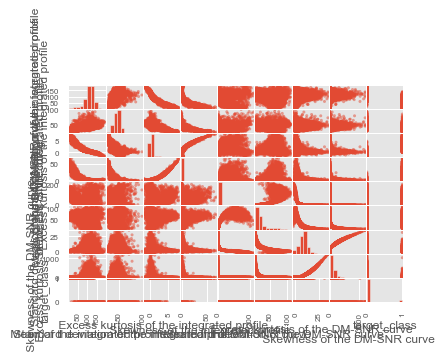

In [4]:
%matplotlib inline
from pandas.plotting import scatter_matrix as sm
sm(df)

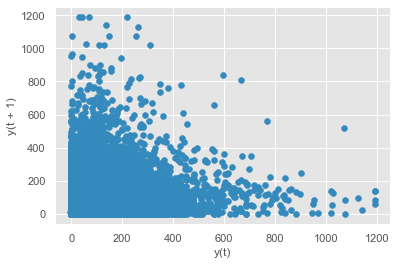

In [5]:
from pandas.plotting import lag_plot
lag_plot(df)

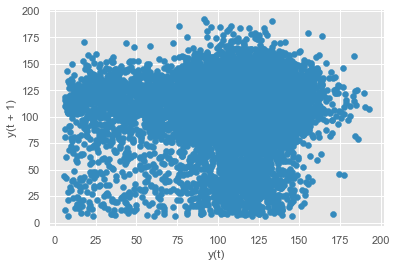

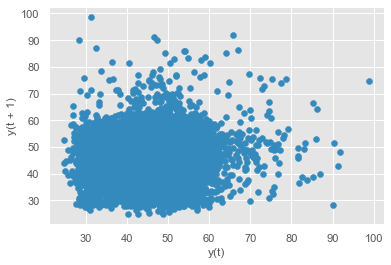

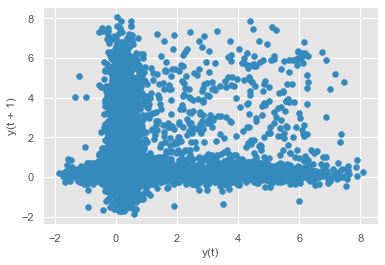

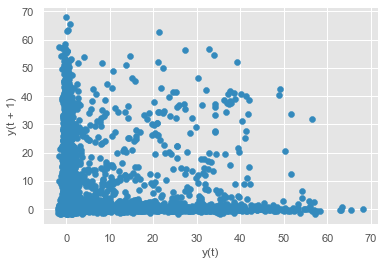

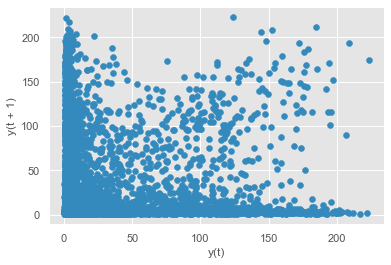

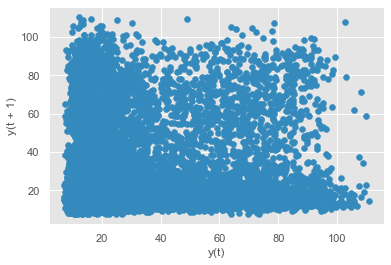

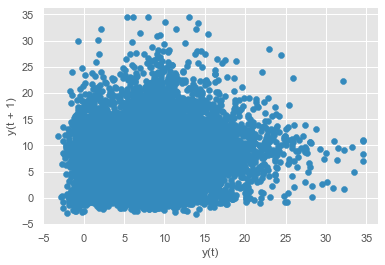

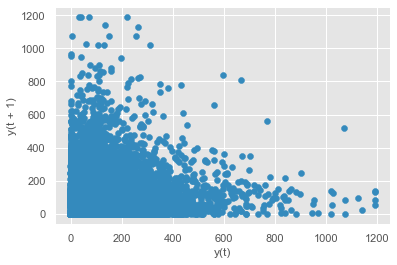

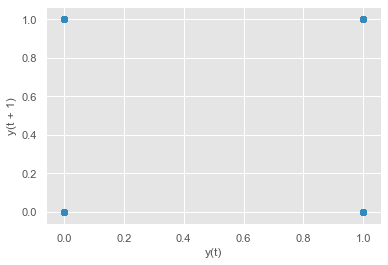

In [6]:
for i in df.columns:
    lag_plot(df[str(i)])
    plt.show()

In [7]:
df.shape

(17898, 9)

In [8]:
df.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


### COUNT PLOT FOR CHECKING FOR IM-BALANCED DATASET ####
##### 1: CLASS CAN BE TREATED AS ANAMOLY
##### HENCE , WE CAN USE ANAMOLY DETECTION ALGORITHM ######

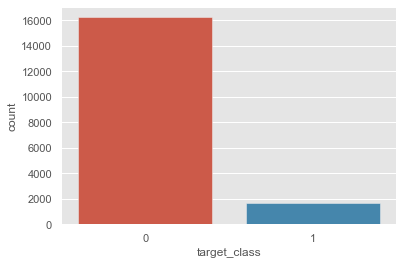

In [9]:
sns.countplot(df.target_class)

In [10]:
df['target_class'].value_counts()/len(df)

0    0.908426
1    0.091574
Name: target_class, dtype: float64

In [11]:
#### CLASS 1 is Sort of OUTLIERS , WEIRD DATA POINTS ###

##### DATA REDUCTION ######

In [12]:
from sklearn.decomposition import PCA
pca = PCA(2)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
pca.fit(x,y)
x_pca=pca.transform(x)

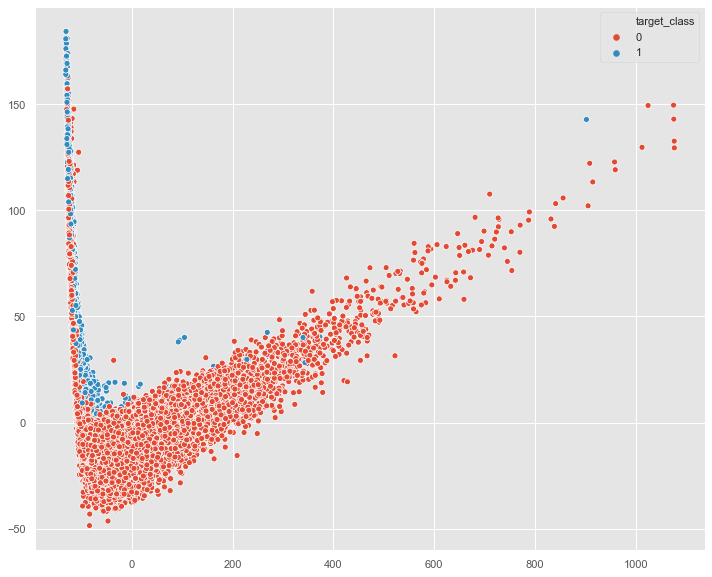

In [13]:
plt.figure(figsize=(12,10))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=y)
plt.show()

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(2)
x_tsne=tsne.fit_transform(x,y)

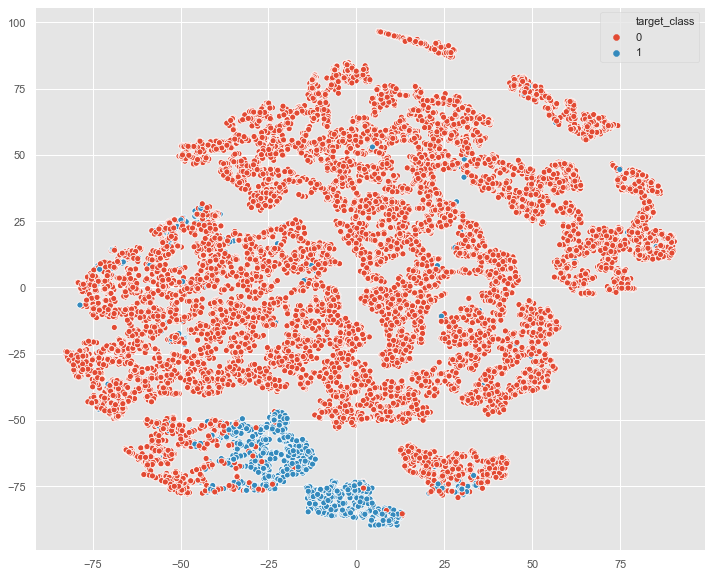

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(x_tsne[:,0],x_tsne[:,1],hue=y)
plt.show()

In [17]:
df_pca = pd.DataFrame(x_pca,columns=['x','y'])
df_tsne = pd.DataFrame(x_tsne,columns=['x','y'])
df_pca['target'] = y
df_tsne['target'] = y

#### SPLITING DATASETS IN TRAIN and TEST ####

In [21]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y)

### ANAMOLY DETECTION ALGORITHM : ISOLATION FOREST

In [22]:
from sklearn.ensemble import IsolationForest as IF
iff = IF()
iff.fit(x_train,y_train)

A:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
A:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [26]:
y_pred=iff.predict(x_test)

In [27]:
y_pred[:5]

array([1, 1, 1, 1, 1])

In [30]:
y_pred2 = pd.DataFrame(y_pred,columns=['target_class'])


In [32]:
y_pred2['target_class']=y_pred2['target_class'].replace(1,0)


In [33]:
y_pred2['target_class'] = y_pred2['target_class'].replace(-1,1)

In [35]:
y_pred2.shape

(4475, 1)

In [39]:
y_pred2['target_class'].value_counts()

0    4031
1     444
Name: target_class, dtype: int64

### DISPLAYING RESULTS ###

[[3859  200]
 [ 172  244]]
0.9168715083798883


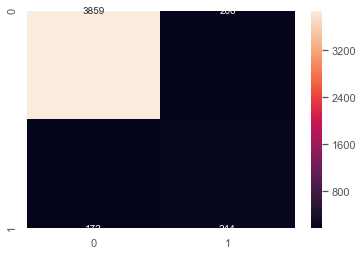

In [41]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac
print(cm(y_test,y_pred2))
print(ac(y_test,y_pred2))
sns.heatmap(cm(y_test,y_pred2),annot=True,fmt='d')

In [42]:
######### 91% accuracy ###############

In [43]:
############# TSNE #####################

In [45]:
x_train2,x_test2,y_train2,y_test2 = tts(x_tsne,y)
from sklearn.ensemble import IsolationForest as IF2
iff2 = IF2(behaviour='new')
iff2.fit(x_train2,y_train2)
y_pred_tsne = iff2.predict(x_test2)

A:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [52]:
y_pred_tsne2=pd.DataFrame(y_pred_tsne,columns=['target'])


In [53]:
y_pred_tsne2['target'].value_counts()

 1    4043
-1     432
Name: target, dtype: int64

In [54]:
y_pred_tsne2['target']=y_pred_tsne2['target'].replace(1,0)

In [55]:
y_pred_tsne2['target']=y_pred_tsne2['target'].replace(-1,1)

In [56]:
cm(y_test2,y_pred_tsne2)

array([[3691,  372],
       [ 352,   60]], dtype=int64)

In [57]:
ac(y_test2,y_pred_tsne2)

0.8382122905027933

# THE END ###################